In [162]:
import os
import numpy as np
import matplotlib.pyplot as pyp
import matplotlib
from scipy.interpolate import interp1d
%matplotlib inline


In [174]:
cmap = matplotlib.cm.get_cmap('cool')

In [175]:
def lorentzian_gaussian_background_func(psi, E_0, frac_gauss, gauss_peak, gauss_width, E_1, width2):
    v = (psi - gauss_peak) / gauss_width
    E_field = E_0*(frac_gauss*np.exp(-v**2/2.)  + (1-frac_gauss)/(1+v**2)) + E_1*np.exp(-psi**2/2./width2**2)
    #E_field = E_1*(frac_gauss*np.exp(-psi**2/(2.*width2) )) + E_0 * (1-frac_gauss) /(width2*(1. + (v/width2)**2))
    
    return E_field

In [176]:
h = 1
zenith_list = np.array([60, 70, 75, 80, 85, 87])
f_Lo_list = np.arange(10., 1610., 10.)
bandwidth_list = np.array([10.])

fit_file = np.load(os.environ['TAU_ACC_ZHAIRES_DIR']+'/curve_fits_%dkm.npz'%h, 'r')
curve_fit_parms_array = fit_file['curve_fit_parms']
zenith_list = fit_file['zenith_list']
f_Lo_list = fit_file['f_Lo_list']
bandwidth = fit_file['bandwidth']

In [177]:
zenith_list = np.array([60, 70, 75, 80, 85, 87])
f_Lo_list = np.arange(10., 1610., 10.)
bandwidth_list = np.array([10.])
psi_list = np.array(range(1,81))*0.04
bandwidth = bandwidth_list[0]

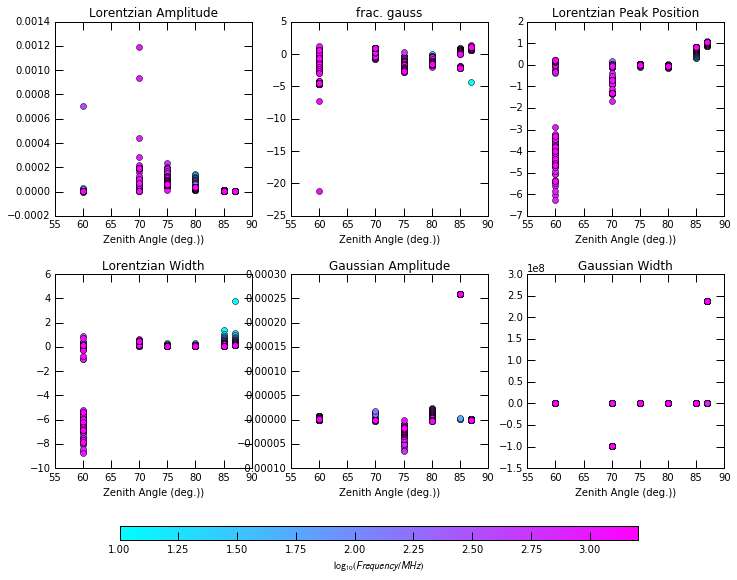

In [178]:
norm = matplotlib.colors.Normalize(vmin=np.log10(f_Lo_list.min()), vmax=np.log10(f_Lo_list.max()))

fig = pyp.figure(1, figsize=(12,8))
pyp.subplots_adjust(hspace=0.3)
for i_f_Lo, f_Lo in enumerate(f_Lo_list):
    for parm in range(0,6):
        pyp.subplot(2,3,parm+1)
        pyp.plot(zenith_list, curve_fit_parms_array[:, i_f_Lo, parm], 'o', color=cmap(norm(np.log10(f_Lo))))

            
titles = ['Lorentzian Amplitude', 'frac. gauss', 'Lorentzian Peak Position', 'Lorentzian Width', 'Gaussian Amplitude', "Gaussian Width"]
for subplot, tit in enumerate(titles):
    pyp.subplot(2,3,subplot+1)
    pyp.title(tit)
    pyp.xlabel("Zenith Angle (deg.))")
    
# Set up the colorbar for the plot.
ax1 = fig.add_axes([0.2, -.0, 0.6, 0.025])
cb1 = matplotlib.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('$\log_{10}(Frequency/MHz)$')


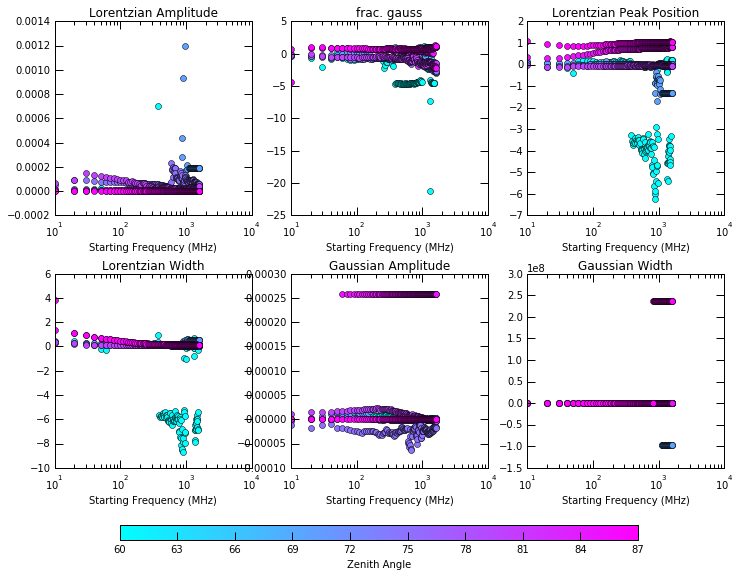

In [179]:
norm = matplotlib.colors.Normalize(vmin=zenith_list.min(), vmax=zenith_list.max())

fig = pyp.figure(1, figsize=(12,8))
pyp.subplots_adjust(hspace=0.3)
for i_ze, ze in enumerate(zenith_list):
    for parm in range(0,6):
        pyp.subplot(2,3,parm+1)
        pyp.semilogx(f_Lo_list, curve_fit_parms_array[i_ze, :, parm], 'o', color=cmap(norm(ze)))

titles = ['Lorentzian Amplitude', 'frac. gauss', 'Lorentzian Peak Position', 'Lorentzian Width', 'Gaussian Amplitude', "Gaussian Width"]
for subplot, tit in enumerate(titles):
    ax = pyp.subplot(2,3,subplot+1)
    pyp.title(tit)
    pyp.xlabel("Starting Frequency (MHz)")
    
# Set up the colorbar for the plot.
ax1 = fig.add_axes([0.2, -.0, 0.6, 0.025])
cb1 = matplotlib.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Zenith Angle')



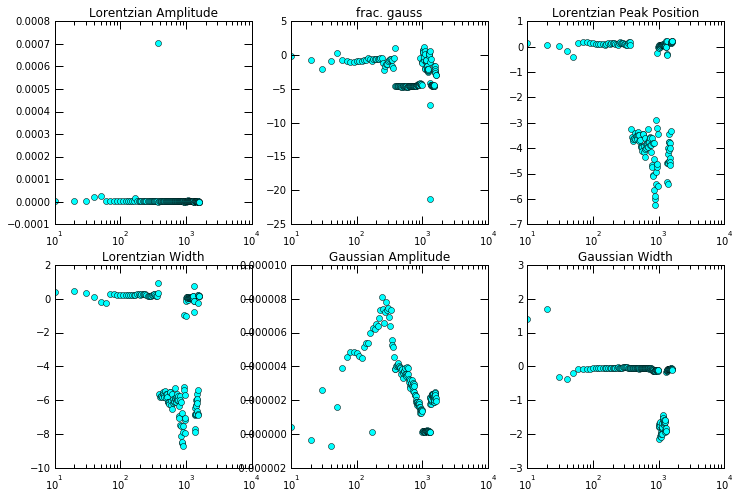

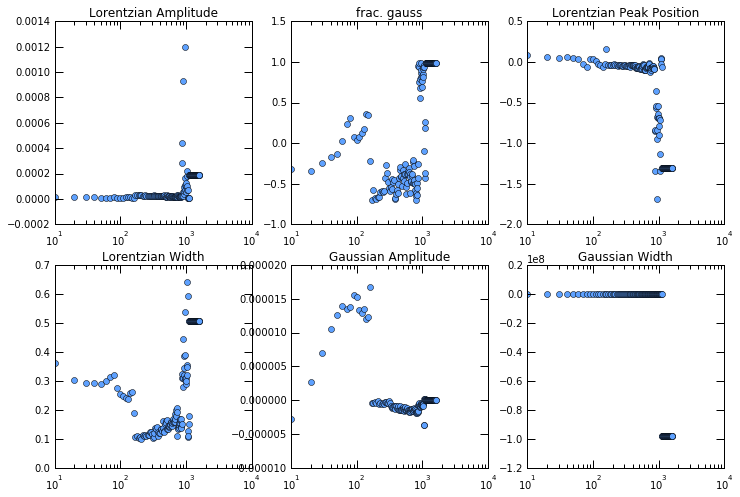

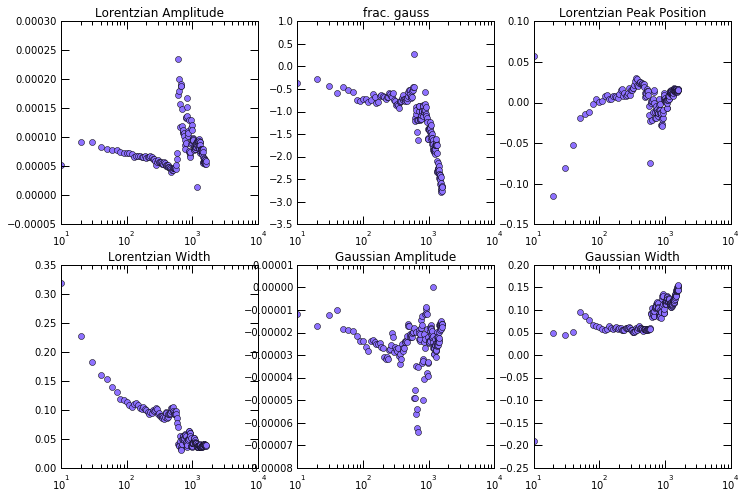

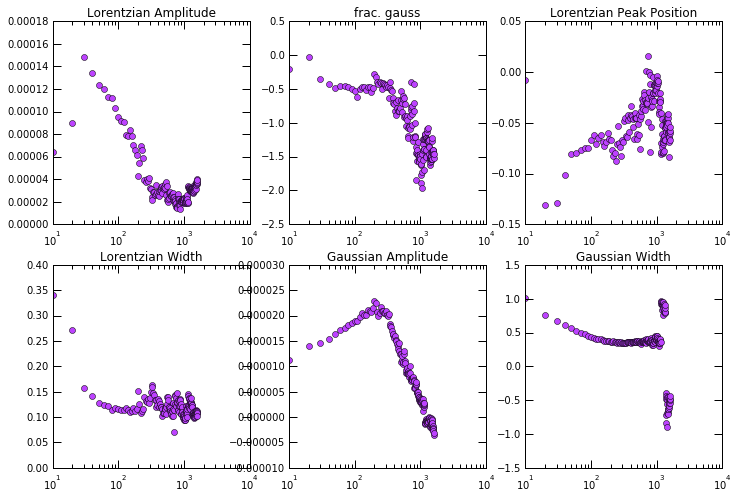

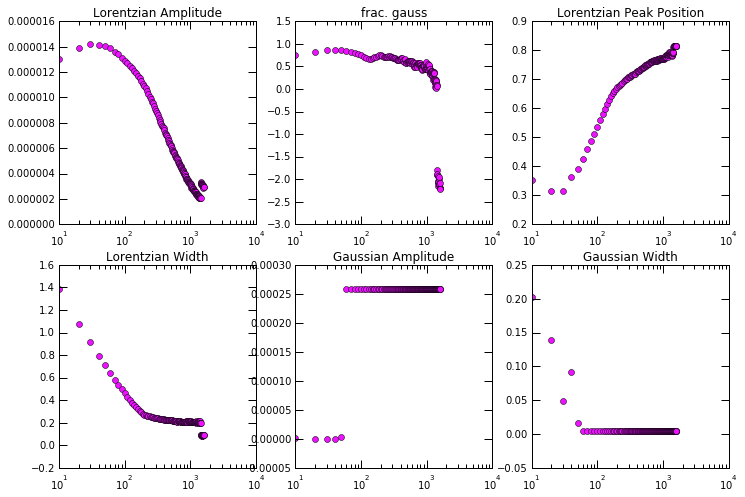

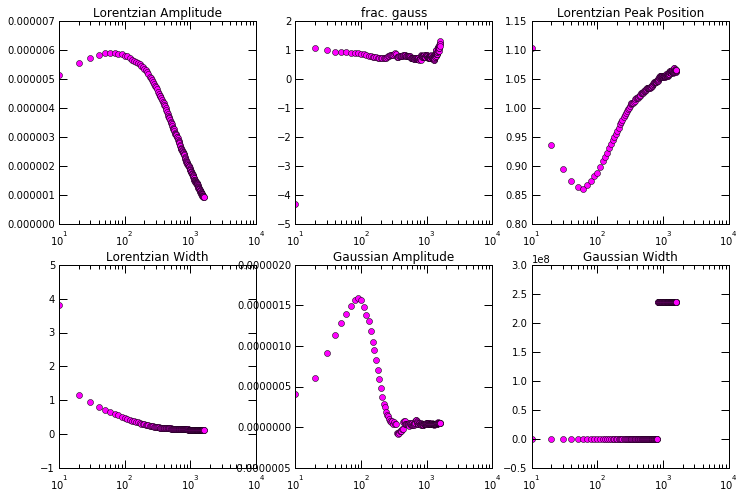

In [180]:
norm = matplotlib.colors.Normalize(vmin=zenith_list.min(), vmax=zenith_list.max())
for i_ze, ze in enumerate(zenith_list):
    pyp.figure(i_ze, figsize=(12,8))

    for parm in range(0,6):
        pyp.subplot(2,3,parm+1)
        pyp.semilogx(f_Lo_list, curve_fit_parms_array[i_ze, :, parm], 'o', color=cmap(norm(ze)))

           
    titles = ['Lorentzian Amplitude', 'frac. gauss', 'Lorentzian Peak Position', 'Lorentzian Width', 'Gaussian Amplitude', "Gaussian Width"]
    for subplot, tit in enumerate(titles):
        pyp.subplot(2,3,subplot+1)
        pyp.title(tit)

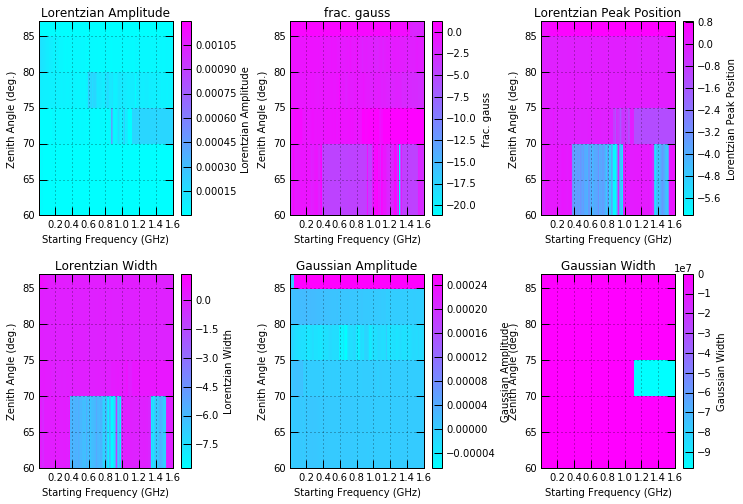

In [186]:
## Heat maps of the curve fit parameters

fig = pyp.figure(1, figsize=(12,8))
pyp.subplots_adjust(hspace=0.3, wspace=0.5)
for parm in range(0,6):
    ax = pyp.subplot(2,3,parm+1)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    start_freq, zenith = np.meshgrid(f_Lo_list/1000., zenith_list)
    H=np.array(curve_fit_parms_array[:,:,parm])
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    pyp.pcolormesh(start_freq, zenith, Hmasked, cmap='cool')
    pyp.ylim(zenith_list.min(), zenith_list.max())
    pyp.xlim(f_Lo_list.min()/1000., f_Lo_list.max()/1000.)
    pyp.colorbar(label=titles[parm])
    pyp.ylabel('Zenith Angle (deg.)')
    pyp.xlabel('Starting Frequency (GHz)')
    pyp.grid(True, which='both')
    pyp.title(titles[parm])

In [187]:
### Set up an interpolator for all the fit parameters
###
######################################################
E0_interp = interp1d(zenith_list, curve_fit_parms_array[:, 40, 0])
frac_gauss_interp = interp1d(zenith_list,curve_fit_parms_array[:,40, 1], )
gauss_peak_interp = interp1d(zenith_list,curve_fit_parms_array[:,40, 2])
gauss_width_interp = interp1d(zenith_list,curve_fit_parms_array[:,40, 3])
E1_interp = interp1d(zenith_list,curve_fit_parms_array[:,40, 4])
width2_interp = interp1d(zenith_list,curve_fit_parms_array[:,40, 5])

parm_interp = [E0_interp, frac_gauss_interp, gauss_peak_interp, gauss_width_interp, E1_interp, width2_interp]
ze_interp = np.arange(60, 87, 0.1)

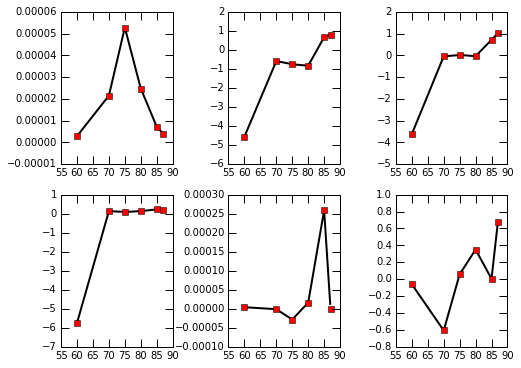

In [188]:
pyp.figure(figsize=(8,6))
pyp.subplots_adjust(wspace=0.5)
for parm in range(0,6):
    pyp.subplot(2,3,parm+1)
    pyp.plot(ze_interp, parm_interp[parm](ze_interp), 'k', linewidth=2)
    pyp.plot(zenith_list, curve_fit_parms_array[:,40,parm], "sr")

Bandwidth :  10.0


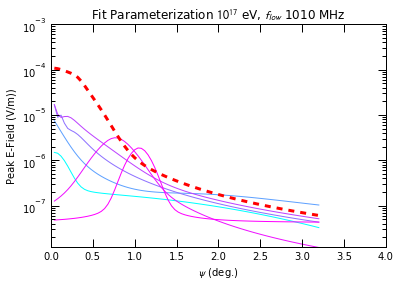

In [189]:
# Fit curves using a starting frequency of 25 MHz and varying the bandwidth.
# Using the initial parameters from the ANITA curve fit above 
# BUT finding the peak for each curve.
# NOTE: SHIFTING FROM 1.01 deg to peak in the efield.
# Fit fails if initial parameter for gauss_peak is not close
norm = matplotlib.colors.Normalize(vmin=zenith_list.min(), vmax=zenith_list.max())

i_bandwidth = 0
bandwidth = bandwidth_list[i_bandwidth]
print "Bandwidth : ", bandwidth
i_f_Lo = 100

pyp.figure()
curve_fit_parameters = np.zeros((len(f_Lo_list), len(zenith_list), 6))
for i_ze in range(0,len(zenith_list)):
        z = zenith_list[i_ze]
        popt = curve_fit_parms_array[i_ze,i_f_Lo,:]
        pyp.semilogy(psi_list, lorentzian_gaussian_background_func(psi_list, *popt),  color=cmap(norm(z)))

ze = 82
E0_interp = interp1d(zenith_list,curve_fit_parms_array[:,i_f_Lo,0])
frac_gauss_interp = interp1d(zenith_list,curve_fit_parms_array[:,i_f_Lo,1], )
gauss_peak_interp = interp1d(zenith_list,curve_fit_parms_array[:,i_f_Lo, 2])
gauss_width_interp = interp1d(zenith_list,curve_fit_parms_array[ :,i_f_Lo, 3])
E1_interp = interp1d(zenith_list,curve_fit_parms_array[ :,i_f_Lo, 4])
width2_interp = interp1d(zenith_list,curve_fit_parms_array[:,i_f_Lo, 5])

interp_parms = [E0_interp(ze), frac_gauss_interp(ze), gauss_peak_interp(ze),
               gauss_width_interp(ze), E1_interp(ze), width2_interp(ze)]

pyp.plot(psi_list, lorentzian_gaussian_background_func(psi_list, *interp_parms), 'r--', linewidth=3)

pyp.title("Fit Parameterization $10^{17}$ eV, $f_{low}$ %d MHz"%(int(f_Lo_list[i_f_Lo])), fontsize=12)
pyp.ylabel("Peak E-Field (V/m))")
pyp.xlabel("$\psi$ (deg.)")
pyp.xlim(0)
pyp.ylim(0)
pyp.legend(loc=[1.01,0.01])
#pyp.savefig(os.environ['TAU_ACC_DETECTOR_PLOTS_DIR'] + "/efield_eparms_%dMHz_altitude%dkm_ze%d.png"%(int(f_Lo_list[i_f_Lo]),h,z) )